## Chocolates Analysis

In [368]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, variation, zscore

In [369]:
# Reading csv file (Dataset)
df=pd.read_excel('chocolates.xlsx')

In [370]:
df.head()

,Company,Bar Name,Ref,Review Year,Cocoa Percent,Company Location,Rating
0,Alain Ducasse,Trinite,1215,2014,0.65,France,2.75
1,Altus aka Cao Artisan,Acopagro,1728,2016,0.60,U.S.A.,3.00
2,Amano,Ocumare,175,2007,0.70,U.S.A.,3.75
3,Arete,Chuno,1598,2015,0.70,U.S.A.,4.00
4,Artisan du Chocolat,"Trinidad, Heritage, Limited ed.",1193,2013,0.72,U.K.,3.25


In [371]:
df.shape

(1708, 7)

In [372]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ref,1708.0,991.405738,529.482620,5.00,552.00,1026.00,1454.00,1864.0
Review Year,1708.0,2012.124122,2.856424,2006.00,2010.00,2013.00,2015.00,2016.0
Cocoa Percent,1708.0,0.717242,0.064342,0.42,0.70,0.70,0.75,1.0
Rating,1708.0,3.182377,0.482827,1.00,2.75,3.25,3.50,5.0


In [373]:
df.isnull().sum()

Company             0
Bar Name            0
Ref                 0
Review Year         0
Cocoa Percent       0
Company Location    0
Rating              0
dtype: int64

In [374]:
df.mean()

Ref               991.405738
Review Year      2012.124122
Cocoa Percent       0.717242
Rating              3.182377
dtype: float64

In [375]:
df.median()

Ref              1026.00
Review Year      2013.00
Cocoa Percent       0.70
Rating              3.25
dtype: float64

In [376]:
df.loc[:,'Cocoa Percent'].mode()

0    0.7
dtype: float64

In [377]:
df.loc[:,'Review Year'].mode()

0    2015
dtype: int64

In [378]:
df.loc[:,'Rating'].mode()

0    3.5
dtype: float64

In [379]:
df.loc[:,'Company'].mode()

0    Soma
dtype: object

In [380]:
print(df.loc[:,'Bar Name'].mode())
print(df[df['Bar Name']=="Madagascar"]['Ref'].count())

0    Madagascar
dtype: object
55


In [381]:
# finding variance
np.var(df)

Ref              280187.704815
Review Year           8.154383
Cocoa Percent         0.004137
Rating                0.232986
dtype: float64

In [382]:
# finding standard deviation
np.std(df)

Ref              529.327597
Review Year        2.855588
Cocoa Percent      0.064323
Rating             0.482686
dtype: float64

In [383]:
# finding covariance
df.cov()

,Ref,Review Year,Cocoa Percent,Rating
Ref,280351.845239,1490.216159,1.632930,24.753727
Review Year,1490.216159,8.159160,0.008521,0.131275
Cocoa Percent,1.632930,0.008521,0.004140,-0.005198
Rating,24.753727,0.131275,-0.005198,0.233122


In [384]:
# finding coefficient of variance
variation(df['Cocoa Percent'])

0.08968066168591694

In [385]:
#finding zscore
zscore(df['Cocoa Percent'])

array([-1.0453901 , -1.82271978, -0.26806041, ..., -1.20085603,
       -0.26806041,  2.68579238])

In [386]:
# creating frequency table
dt1 = pd.DataFrame(df['Rating'].value_counts()).reset_index().sort_values('index').reset_index(drop=True)
dt1.columns = ['Rating', 'Frequency']
dt1

,Rating,Frequency
0,1.00,4
1,1.50,10
2,1.75,3
3,2.00,32
4,2.25,13
5,2.50,124
6,2.75,246
7,3.00,331
8,3.25,281
9,3.50,365


In [387]:
# creating bins
dt1['Ratings'] = pd.cut(x=dt1['Rating'], bins=[0, 1, 2, 3, 4, 5])
dt1.drop(['Rating'], axis=1, inplace = True)
data = dt1.groupby(['Ratings']).sum()
data

,Frequency
Ratings,
"(0, 1]",4
"(1, 2]",45
"(2, 3]",714
"(3, 4]",943
"(4, 5]",2


In [388]:
# calculating culmulative frequency
data['Culmulative Frequency'] = data.cumsum()
data

,Frequency,Culmulative Frequency
Ratings,,
"(0, 1]",4,4
"(1, 2]",45,49
"(2, 3]",714,763
"(3, 4]",943,1706
"(4, 5]",2,1708


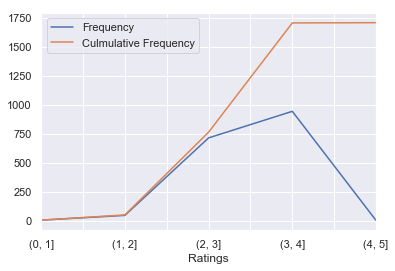

In [389]:
data.plot()

In [405]:
# finding skewness of data
df.skew()

Ref             -0.146015
Review Year     -0.524789
Cocoa Percent    1.044512
Rating          -0.571676
dtype: float64

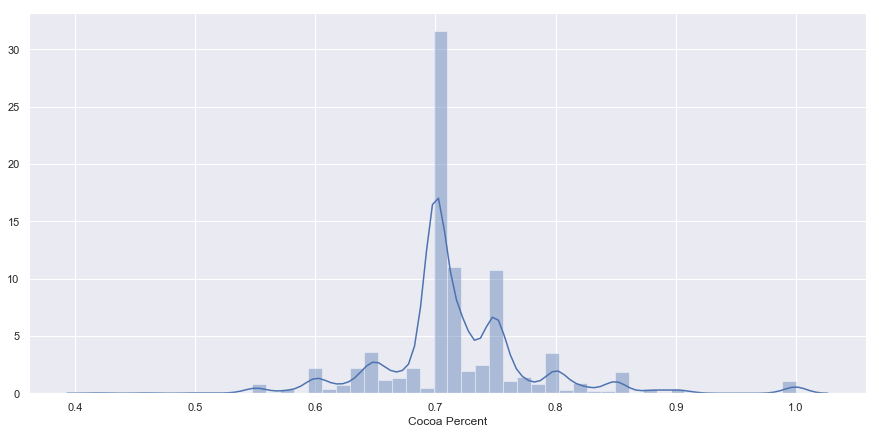

In [391]:
plt.figure(figsize=(15,7))
sns.distplot(df['Cocoa Percent'])
ax.set_title('Cocoa %, Distribution')
plt.show()

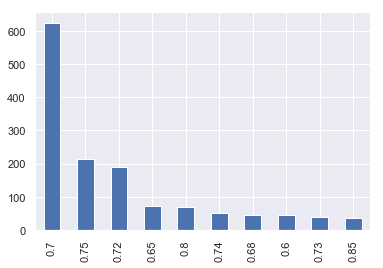

In [392]:
df['Cocoa Percent'].value_counts().head(10).plot.bar()

Text(0.5, 1.0, 'Cocoa Percentage patterns over the years \n')

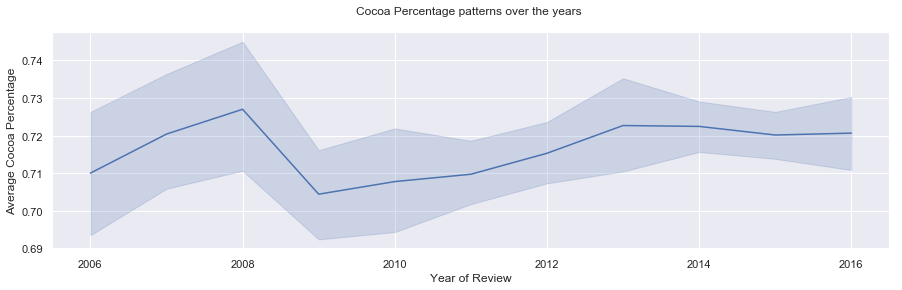

In [393]:
plt.figure(figsize=(15, 4))
sns.lineplot(x='Review Year', y=df['Cocoa Percent'], data=df)
plt.xlabel("Year of Review")
plt.ylabel("Average Cocoa Percentage")
plt.title("Cocoa Percentage patterns over the years \n")

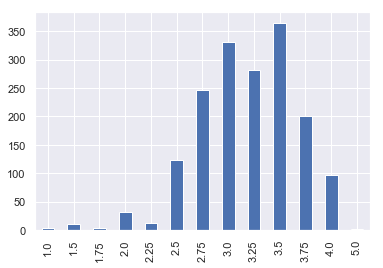

In [395]:
df['Rating'].value_counts().sort_index().plot.bar()

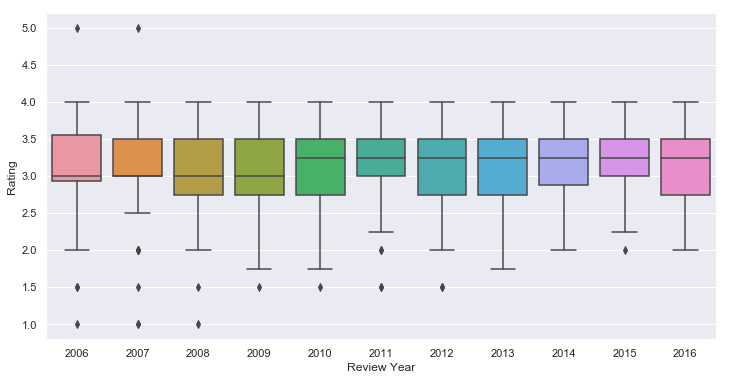

In [396]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Review Year', y='Rating',data=df)

In [398]:
df[df['Rating']==5]

,Company,Bar Name,Ref,Review Year,Cocoa Percent,Company Location,Rating
1523,Amedei,Chuao,111,2007,0.7,Italy,5.0
1596,Amedei,Toscano Black,40,2006,0.7,Italy,5.0


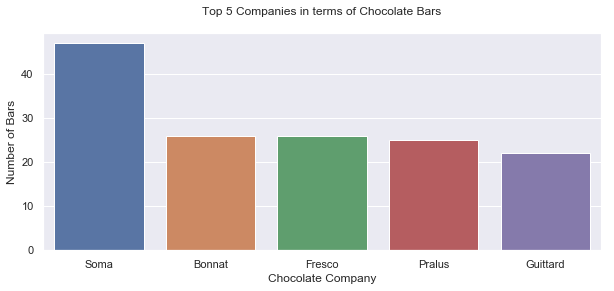

In [400]:
# Top 5 companies in terms of chocolate bars in this dataset
d = df['Company'].value_counts().sort_values(ascending=False).head(5)
d = pd.DataFrame(d)
d = d.reset_index() # dataframe with top 5 companies

# Plotting
sns.set()
plt.figure(figsize=(10,4))
sns.barplot(x='index', y='Company', data=d)
plt.xlabel("Chocolate Company")
plt.ylabel("Number of Bars")
plt.title("Top 5 Companies in terms of Chocolate Bars\n")
plt.show()

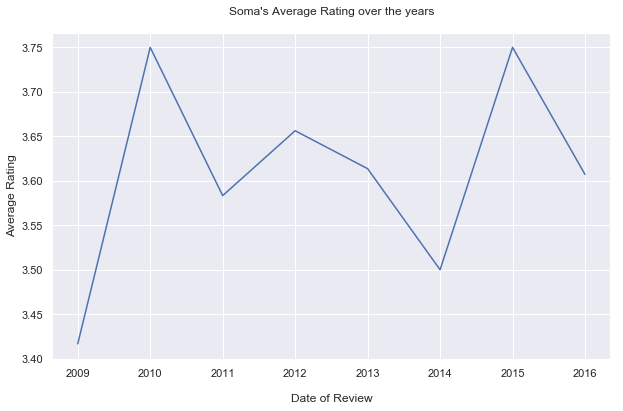

In [403]:
# Soma's performance over the years
d4 = soma.groupby('Review Year').aggregate({'Rating':'mean'})
d4 = d4.reset_index()
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Review Year', y='Rating', data=d4)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Rating")
plt.title("Soma's Average Rating over the years\n")
plt.show()

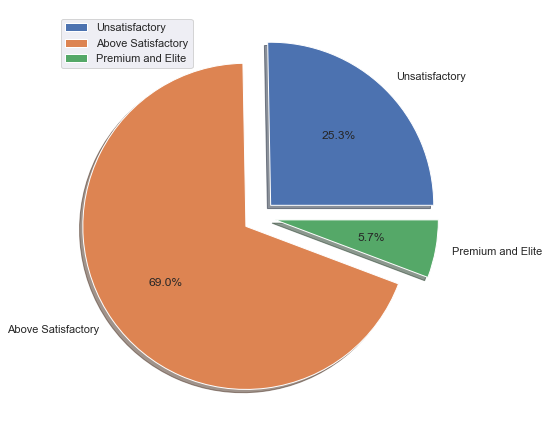

In [404]:
# Chocolate Bar levels
unsatisfactory = df[df['Rating'] < 3.0]
satisfactory = df[(df['Rating'] >= 3.0) & (df.Rating < 4)]
pre_elite = df[df['Rating'] >= 4.0]
label_names=['Unsatisfactory','Above Satisfactory','Premium and Elite']
sizes = [unsatisfactory.shape[0],satisfactory.shape[0],pre_elite.shape[0]]
explode = (0.1, 0.1, 0.1)

# Plot
plt.figure(figsize=(7.5, 7.5))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.legend(labels, loc="best")